
## __*TP2 : Apprentissage supervisé - Random Forest*__

<br>

#### __Exercice 1: Classification avec des Forêts Aléatoires__

* Objectif : Dans cet exercice, `vous utiliserez des forêts aléatoires pour classer des données sur des fleurs`   
en différentes catégories.

* __Données : Nous utiliserons le jeu de données Iris, qui contient des mesures de différentes caractéristiques  
de trois espèces de fleurs. Vous pouvez le charger en utilisant scikit-learn.__

<br>

__Instructions :__

* Importez les bibliothèques nécessaires, y compris scikit-learn. 
* Chargez le jeu de données Iris. 
* Divisez les données en un ensemble d'entraînement et un ensemble de test. 
* Créez un modèle de forêt aléatoire avec les paramètres par défaut.
* Entraînez le modèle sur l'ensemble d'entraînement.
* Faites des prédictions sur l'ensemble de test.
* Évaluez les performances du modèle en utilisant des mesures telles que la précision, le rappel et la F-mesure.
* Expérimentez en ajustant les hyperparamètres du modèle (par exemple, le nombre d'arbres, la profondeur

<br>

__*1. Importez les bibliothèques nécessaires, y compris scikit-learn.* ✅__  
__*2. Chargez le jeu de données Iris.* ✅__

In [1]:
# Référance:
      # https://medium.com/ai-does-it-better/import-csv-data-into-scikit-learn-for-machine-learning-2d2f5c18f100

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report




df = pd.read_csv("iris.csv")
print(df.head(5))



   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


<br>
<br>

__*3. Divisez les données en un ensemble d'entraînement et un ensemble de test*.✅__ 

In [3]:
# Référance:
      # https://builtin.com/data-science/train-test-split#:~:text=Train%20test%20split%20is%20a%20machine%20learning%20technique%20that%20divides,performs%20well%20on%20unseen%20data.
      # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


# les features (X) et la cible (y)
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = y = df['variety']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


print("\nles features :\n", X.head(5))
print("\n\nla cible :", y.head(5))


les features :
    sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


la cible : 0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object


__- Ensemble de donné de train__

In [4]:
print("\n\nLes donnée de X_train\n\n", X_train)
print("\n\n\nLes donnée de y_train\n\n", y_train)




Les donnée de X_train

      sepal.length  sepal.width  petal.length  petal.width
96            5.7          2.9           4.2          1.3
105           7.6          3.0           6.6          2.1
66            5.6          3.0           4.5          1.5
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[100 rows x 4 columns]



Les donnée de y_train

 96     Versicolor
105     Virginica
66     Versicolor
0          Setosa
122     Virginica
          ...    
71     Versicolor
106     Virginica
14         Setosa
92     Versicolor
102     Virginica
Name: variety, Length: 100, d

<br>

__- Ensemble de donné de test__

In [5]:
print("\n\nLes donnée de X_test\n\n", X_test.head(10))
print("\n\nLes donnée de Y_test\n\n", y_test.head(10))



Les donnée de X_test

      sepal.length  sepal.width  petal.length  petal.width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
31            5.4          3.4           1.5          0.4
64            5.6          2.9           3.6          1.3
141           6.9          3.1           5.1          2.3
68            6.2          2.2           4.5          1.5
82            5.8          2.7           3.9          1.2


Les donnée de Y_test

 73     Versicolor
18         Setosa
118     Virginica
78     Versicolor
76     Versicolor
31         Setosa
64     Versicolor
141     Virginica
68     Versicolor
82     Versicolor
Name: variety, dtype: object


<br>
<br>

__*4. Créez un modèle de forêt aléatoire avec les paramètres par défaut*.✅__

In [6]:
# Référance
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    # https://www.stat4decision.com/fr/foret-aleatoire-avec-python/
    # https://kwamimayeden.com/la-foret-aleatoire-random-forest-en-machine-learning/
    # https://www.geeksforgeeks.org/dsa/random-forest-classifier-using-scikit-learn/


classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


<br>
<br>


__*5. Évaluez les performances du modèle en utilisant des mesures telles que la précision, le rappel et la F-mesure*.✅__


Accuracy:
 98.0 %

Confusion Matrice: 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

Classification Report: 
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



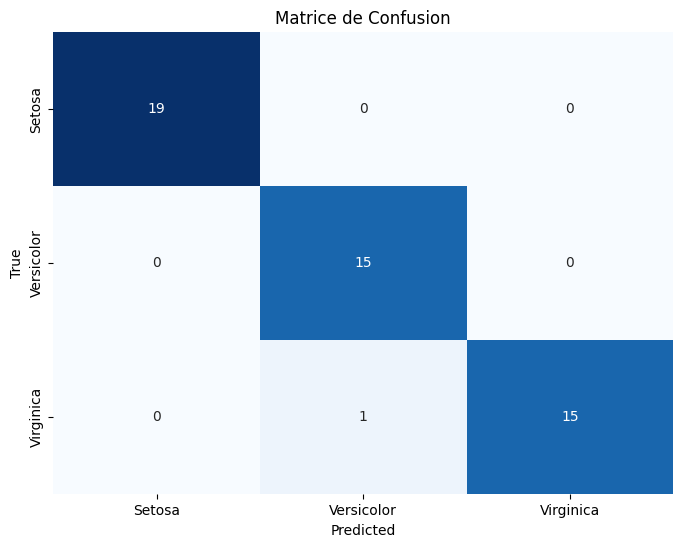

In [7]:
acc = accuracy_score(y_test,y_pred)*100
print("\nAccuracy:\n",round(acc,2),"%")

conf_matrice = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrice:","\n",conf_matrice)

rapport = classification_report(y_test,y_pred)
print("\nClassification Report:","\n",rapport)



plt.figure(figsize=(8,6))
class_names = sorted(y_test.unique())
sns.heatmap(
        conf_matrice, 
        annot=True, 
        fmt='g', 
        cmap='Blues', 
        cbar=False, 
        xticklabels= class_names,
        yticklabels= class_names
)
plt.title("Matrice de Confusion")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<br>
<br>


__*6. Expérimentez en ajustant les hyperparamètres du modèle (par exemple, le nombre d'arbres, la profondeur*.✅__  
<br>

__*7. Évaluez les performances du modèle en utilisant des mesures telles que la
précision, le rappel et la F-mesure*.✅__


__*8. Expérimentez en ajustant les hyperparamètres du modèle (par exemple, le
nombre d'arbres, la profondeur*.✅__

In [8]:
# Réference : 
     # https://medium.com/@kalpit.sharma/mastering-random-forest-hyperparameter-tuning-for-enhanced-machine-learning-models-2d1a8c6c426f
     # https://pub.aimind.so/fine-tuning-random-forest-a-guide-to-refining-hyperparameters-for-maximum-accuracy-1ffe46d11da2
     # https://www.kaggle.com/code/nargisbegum82/hyperparameter-tuning-in-random-forests



class_tuned = RandomForestClassifier(
        n_estimators=200,
        max_depth=30,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        criterion='gini',
        class_weight=None,
        random_state=42
)


class_tuned.fit(X_train, y_train)
y_pred_tuned = class_tuned.predict(X_test)
print("Le rapport hyperparamètres :\n",classification_report(y_test, y_pred_tuned))



Le rapport hyperparamètres :
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<br>
<br>
<br>


## __*Exercice 2 : Optimisation des Forêts Aléatoires*__

<br>

* `Objectif` : Dans cet exercice, vous `explorerez les techniques d'optimisation des forêts aléatoires` pour améliorer les performances d'un modèle.

* __Données : Nous utiliserons le jeu de données CIFAR-10, qui contient 60 000 images réparties en 10 classes différentes.   
Vous pouvez le télécharger depuis la bibliothèque torchvision de PyTorch.__

<br>

__- Instructions :__

* Importez les bibliothèques nécessaires, y compris `scikit-learn et PyTorch`.
<br>

* Chargez le jeu de données `CIFAR-10`.
* Prétraitez les données en les normalisant et en les divisant en ensembles d'entraînement, de validation et de test.
* Créez un modèle de forêt aléatoire pour la classification des images. Vous
pouvez utiliser la classe `RandomForestClassifier` de scikit-learn.
* Entraînez le modèle sur l'ensemble d'entraînement et évaluez ses  
performances sur l'ensemble de validation en utilisant une métrique de votre  
choix (par exemple, l'exactitude).
* Explorez `les hyperparamètres du modèle`, `tels que le nombre d'arbres`, 
`la profondeur maximale des arbres`, et `d'autres paramètres pertinents`.   
Utilisez la recherche en grille ou la recherche aléatoire pour trouver les meilleures
combinaisons d'hyper paramètres qui améliorent les performances du modèle
sur l'ensemble de validation.
* Une fois que vous avez obtenu `les meilleurs hyperparamètres`, 
`évaluez les performances du modèle sur l'ensemble de test`   
pour obtenir une estimation réaliste de ses performances en situation réelle.

<br>

__*1. Importez les bibliothèques nécessaires, y compris `scikit-learn et PyTorch`*.__

In [4]:
# Références :
# https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# https://docs.pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html
# https://medium.com/@thatchawin.ler/cifar10-with-resnet-in-pytorch-a86fe18049df


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split

<br>

__*2. Chargement du jeu de données `CIFAR-10`*.__

In [ ]:

transform = transforms.Compose([
        # J'ai utilisé resize car les images sont trop grandes pour le CPU
    transforms.Resize((16, 16)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Charger CIFAR-10
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Fonction pour extraire les données
def extract_data(dataset):
    data = []
    labels = []
    for img, label in dataset:
        data.append(img.numpy().flatten())
        labels.append(label)
    return np.array(data, dtype=np.float32), np.array(labels)


X_train_full, y_train_full = extract_data(train_dataset)
X_test, y_test = extract_data(test_dataset)
print("Le nombre d'exemples d'entraînement est :", X_train_full.shape[0])
print("Le nombre d'exemples de test est :", X_test.shape[0])
 

Le nombre d'exemples d'entraînement est : 50000
Le nombre d'exemples de test est : 10000


<br>

__*3. Prétraitez les données en les normalisant et en les divisant en ensembles
d'entraînement, de validation et de test.*.__ 

In [ ]:

# Spéparation des données en train et test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.1,
    random_state=42,
    stratify=y_train_full
)

# prétraitement des données avec un StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


<br>

__*4. Créez un modèle de forêt aléatoire pour la classification des images. Vous
pouvez utiliser la classe RandomForestClassifier de scikit-learn*.__

In [7]:
# Implementation of Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)


<br>

__*5. Entraînez le modèle sur l'ensemble d'entraînement et évaluez ses
performances sur l'ensemble de validation en utilisant une métrique de votre
choix (par exemple, l'exactitude)*.__

In [8]:

rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Précision sur l'ensemble de validation : {val_accuracy:.2f} %")


Précision sur l'ensemble de validation : 0.47 %


* __Le modèle de base classe correctement `environ 47 % des images sur l’ensemble de validation`. Cela montre qu’il reconnaît certaines images, mais pas assez pour être fiable.__

<br>

__*6. Explorez les hyperparamètres du modèle, tels que le nombre d'arbres, la
profondeur maximale des arbres, et d'autres paramètres pertinents. Utilisez la
recherche en grille ou la recherche aléatoire pour trouver les meilleures
combinaisons d'hyper paramètres qui améliorent les performances du modèle
sur l'ensemble de validation.*.__

In [ ]:
# Hyperparamètres de recherche pour un modèle Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grille de recherche
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nMeilleurs paramètres :\n", grid_search.best_params_)
print(f"\nMeilleure précision moyenne (CV) : {grid_search.best_score_:.2f} %")

best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits

Meilleurs paramètres :
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Meilleure précision moyenne (CV) : 0.46 %


* __`Même avec les meilleurs hyperparamètres, le modèle atteint seulement 46 % de précision, donc il n’améliore pas beaucoup le résultat par rapport au modèle de base`.__

<br>

__*7. Une fois que vous avez obtenu les meilleurs hyperparamètres, évaluez les
performances du modèle sur l'ensemble de test pour obtenir une estimation
réaliste de ses performances en situation réelle.*.__

In [10]:
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"\n✅ Précision finale sur l'ensemble de test : {test_accuracy:.2f} %")



✅ Précision finale sur l'ensemble de test : 0.47 %


              precision    recall  f1-score   support

    airplane       0.55      0.56      0.55      1000
  automobile       0.53      0.57      0.55      1000
        bird       0.38      0.33      0.35      1000
         cat       0.35      0.29      0.32      1000
        deer       0.42      0.39      0.40      1000
         dog       0.45      0.40      0.42      1000
        frog       0.48      0.58      0.53      1000
       horse       0.50      0.46      0.48      1000
        ship       0.57      0.61      0.59      1000
       truck       0.47      0.54      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



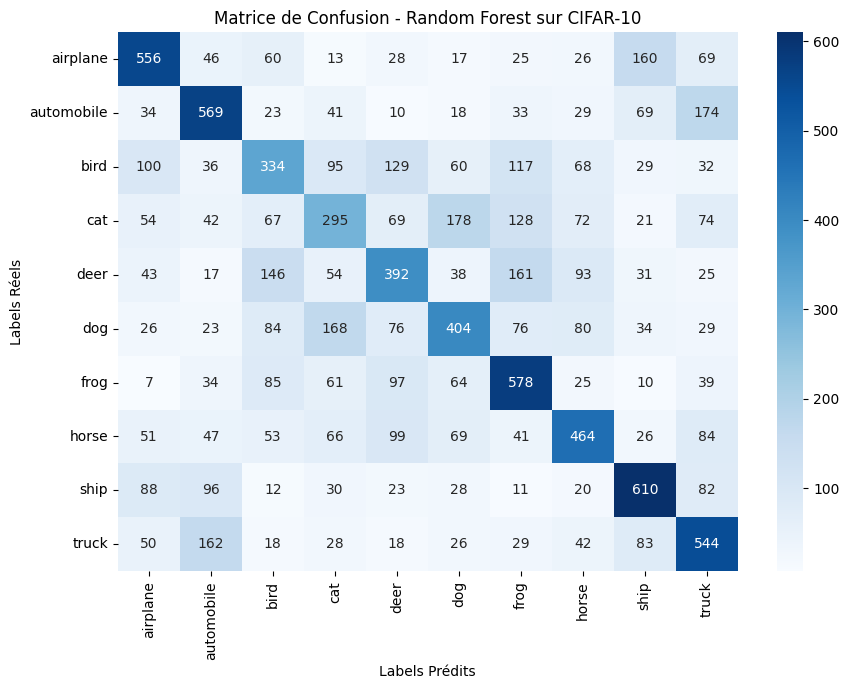

In [ ]:

# Affichage de matrice de confusion et classification report
print(classification_report(y_test, y_test_pred, target_names=train_dataset.classes))

conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=train_dataset.classes,
    yticklabels=train_dataset.classes
)
plt.xlabel('Labels Prédits')
plt.ylabel('Labels Réels')
plt.title('Matrice de Confusion - Random Forest sur CIFAR-10')
plt.show()




<br>


## 🤔 Conclusion

L’expérimentation sur le jeu de données **CIFAR-10** avec un modèle de **Forêt Aléatoire** montre que ce type de modèle est `limité face à la complexité des images`, mais fournit tout de même des résultats exploitables.

### Hyperparamètres optimaux
Les meilleurs hyperparamètres trouvés grâce à la recherche en grille sont :  
```python
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

```

### 📊 Résultats obtenus

Exactitude sur l’ensemble de validation : **47,48 %**

Exactitude sur l’ensemble de test : **47,46 %**